In [1]:
import numpy as np # linear algebra
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn import preprocessing
import plotly as plotly
import seaborn as sns
%matplotlib inline
from plotly import __version__
import plotly.offline as py 
from plotly.offline import init_notebook_mode, plot
init_notebook_mode(connected=True)
from plotly import tools
import plotly.graph_objs as go
import plotly.express as px
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [2]:
listings = pd.read_csv('../listings.csv')
listings_df = listings
len(listings_df)

45756

In [3]:
sentfeatures = pd.read_csv('../sentiment_features.csv')
sentfeatures_df = sentfeatures
len(sentfeatures)

34685

In [4]:
result = sentfeatures_df.merge(listings_df, how="inner", left_on=['listing_id'],right_on=['id'])

In [5]:
result = result.drop(['id','listing_url','scrape_id','last_scraped','picture_url','host_id','host_url','host_name','host_location','host_thumbnail_url',
                             'host_picture_url','host_thumbnail_url','host_verifications','host_has_profile_pic','neighbourhood','bathrooms','minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights',
                             'minimum_minimum_nights','maximum_maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm','calendar_updated','calendar_last_scraped',
                             'first_review','last_review','license','host_is_superhost','instant_bookable'], axis =1)

In [6]:
listings_df = result

In [7]:
le = preprocessing.LabelEncoder()
listings_df['name'] = listings_df['name'].astype(str)
listings_df['name'] = le.fit_transform(listings_df['name'])
listings_df['description'] = le.fit_transform(listings_df['description'].astype(str))
listings_df['neighborhood_overview'] = le.fit_transform(listings_df['neighborhood_overview'].astype(str))
listings_df['host_since'] = le.fit_transform(listings_df['host_since'].astype(str))
listings_df['host_about'] = le.fit_transform(listings_df['host_about'].astype(str))
listings_df['host_response_time'] = le.fit_transform(listings_df['host_response_time'].astype(str))
listings_df['host_response_rate'] = le.fit_transform(listings_df['host_response_rate'].astype(str))
listings_df['host_acceptance_rate'] = le.fit_transform(listings_df['host_acceptance_rate'].astype(str))
listings_df['host_neighbourhood'] = le.fit_transform(listings_df['host_neighbourhood'].astype(str))
listings_df['host_identity_verified'] = le.fit_transform(listings_df['host_identity_verified'].astype(str))
listings_df['neighbourhood_cleansed'] = le.fit_transform(listings_df['neighbourhood_cleansed'].astype(str))
listings_df['neighbourhood_group_cleansed'] = le.fit_transform(listings_df['neighbourhood_group_cleansed'].astype(str))


listings_df['property_type'] = le.fit_transform(listings_df['property_type'].astype(str))
listings_df['room_type'] = le.fit_transform(listings_df['room_type'].astype(str))
listings_df['bathrooms_text'] = le.fit_transform(listings_df['bathrooms_text'].astype(str))
listings_df['amenities'] = le.fit_transform(listings_df['amenities'].astype(str))
listings_df['has_availability'] = le.fit_transform(listings_df['has_availability'].astype(str))

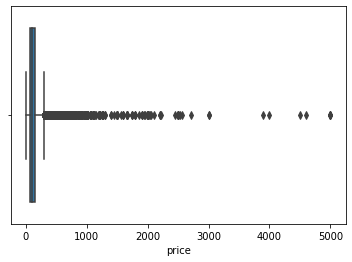

In [8]:
listings_df["price"] = listings_df["price"].str.replace('[\$\,]|\.\d*', '').astype(float)

listings_df = listings_df.drop(listings_df.index[result['price'] >= 5500])
sns.boxplot(x=listings_df['price'])

In [9]:
result = listings_df

In [10]:
result=result.dropna()

In [11]:
X = result.drop(['price'],axis = 1)
y = result['price']

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [14]:
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor

In [15]:
#gboost to predict score
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.01)
GBoost.fit(X_train,y_train)
predictions = GBoost.predict(X_test)

In [33]:
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 40.234550889507624
MSE: 7269.424032795609
RMSE: 85.2609173818556


In [17]:
error_diff = pd.DataFrame({'Actual Values': np.array(y_test).flatten(), 'Predicted Values': predictions.flatten()})
error_diff1 = error_diff.head(20)
error_diff1

,Actual Values,Predicted Values
0,125.0,288.437943
1,175.0,145.581491
2,120.0,191.645000
3,60.0,69.986158
4,325.0,280.397255
5,130.0,117.796477
6,175.0,150.018210
7,25.0,20.912962
8,271.0,316.276353
9,95.0,102.353968


In [18]:
import plotly.graph_objs as go
import plotly.express as px
title=['Pred vs Actual']
fig = go.Figure(data=[
    go.Bar(name='Predicted', x=error_diff1.index, y=error_diff['Predicted Values']),
    go.Bar(name='Actual', x=error_diff1.index, y=error_diff['Actual Values'])
])

fig.update_layout(barmode='group')
fig.show()

c:\python\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



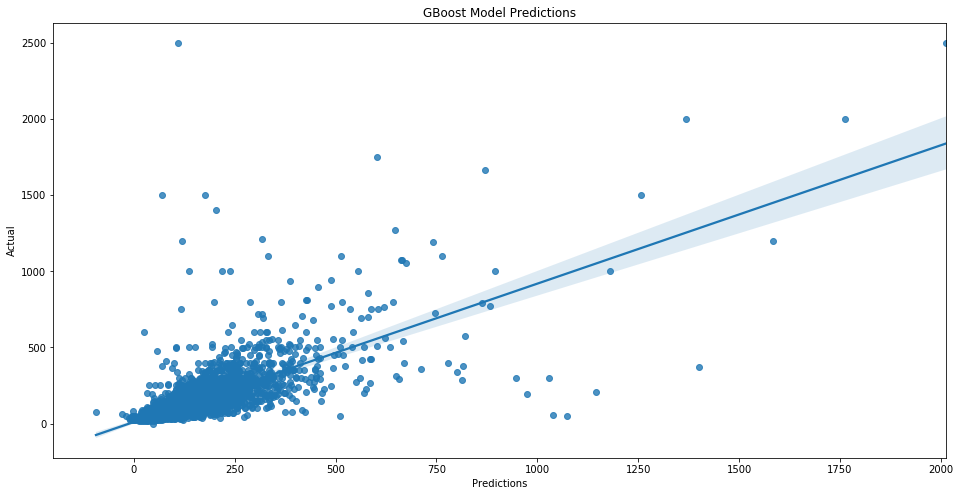

In [19]:
plt.figure(figsize=(16,8))
sns.regplot(predictions,y_test)
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.title("GBoost Model Predictions")
plt.show()

In [20]:
import xgboost
import warnings 
warnings.simplefilter(action='ignore')

In [21]:
#xgboost for prices
xgb = xgboost.XGBRegressor(n_estimators=310,learning_rate=0.1,objective='reg:squarederror')


In [22]:
xgb = xgboost.XGBRegressor(n_estimators=310,learning_rate=0.1,objective='reg:squarederror')
xgb.fit(X_train,y_train)
predictions = xgb.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 40.234550889507624
MSE: 7269.424032795609
RMSE: 85.2609173818556


In [23]:
error_diff = pd.DataFrame({'Actual Values': np.array(y_test).flatten(), 'Predicted Values': predictions.flatten()})
error_diff1 = error_diff.head(20)
error_diff1
title=['Pred vs Actual']
fig = go.Figure(data=[
    go.Bar(name='Predicted', x=error_diff1.index, y=error_diff['Predicted Values']),
    go.Bar(name='Actual', x=error_diff1.index, y=error_diff['Actual Values'])
])

fig.update_layout(barmode='group')
fig.show()

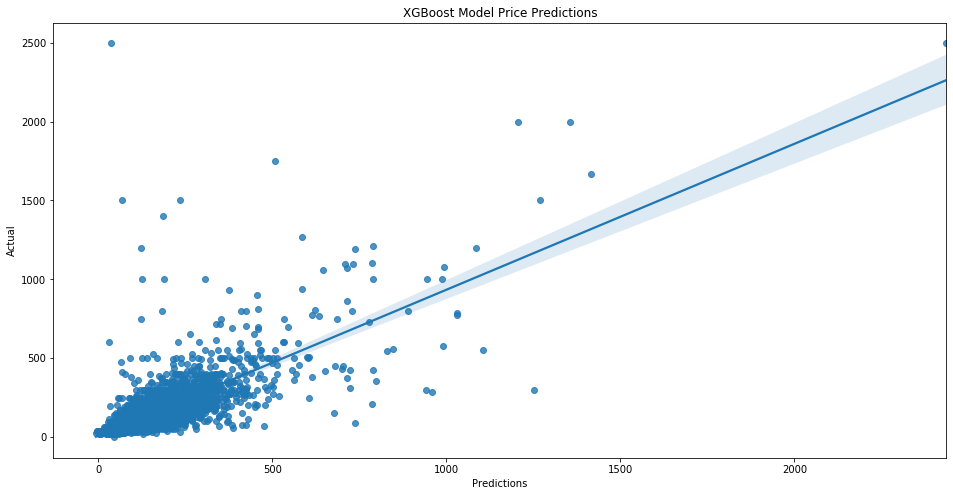

In [24]:
plt.figure(figsize=(16,8))
sns.regplot(predictions,y_test)
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.title("XGBoost Model Price Predictions")
plt.show()

In [25]:

error_diff = pd.DataFrame({'Actual Values': np.array(y_test).flatten(), 'Predicted Values': predictions.flatten()})
error_diff1 = error_diff.head(20)
error_diff1
title=['Pred vs Actual']
fig = go.Figure(data=[
    go.Bar(name='Predicted', x=error_diff1.index, y=error_diff['Predicted Values']),
    go.Bar(name='Actual', x=error_diff1.index, y=error_diff['Actual Values'])
])

fig.update_layout(barmode='group')
fig.show()

In [26]:
# gboost rating predictions
X = result.drop(['review_scores_rating'],axis = 1)
y = result['review_scores_rating']
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X, y, test_size=0.2, random_state=101)

In [27]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.01)
GBoost.fit(X_train_r,y_train_r)
predictions_r = GBoost.predict(X_test_r)

In [28]:
print('MAE:', metrics.mean_absolute_error(y_test_r, predictions_r))
print('MSE:', metrics.mean_squared_error(y_test_r, predictions_r))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test_r, predictions_r)))

MAE: 2.3818872312214237
MSE: 15.171308535169597
RMSE: 3.895036397155949


In [29]:
error_diff = pd.DataFrame({'Actual Values': np.array(y_test_r).flatten(), 'Predicted Values': predictions_r.flatten()})
error_diff1 = error_diff.head(20)
error_diff1

,Actual Values,Predicted Values
0,97.0,96.354656
1,90.0,93.414895
2,97.0,96.035096
3,80.0,88.269262
4,100.0,98.800146
5,100.0,97.492172
6,95.0,95.830754
7,100.0,97.924762
8,75.0,81.616377
9,100.0,99.212305


In [30]:

title=['Pred vs Actual']
fig = go.Figure(data=[
    go.Bar(name='Predicted', x=error_diff1.index, y=error_diff['Predicted Values']),
    go.Bar(name='Actual', x=error_diff1.index, y=error_diff['Actual Values'])
])

fig.update_layout(barmode='group')
fig.show()


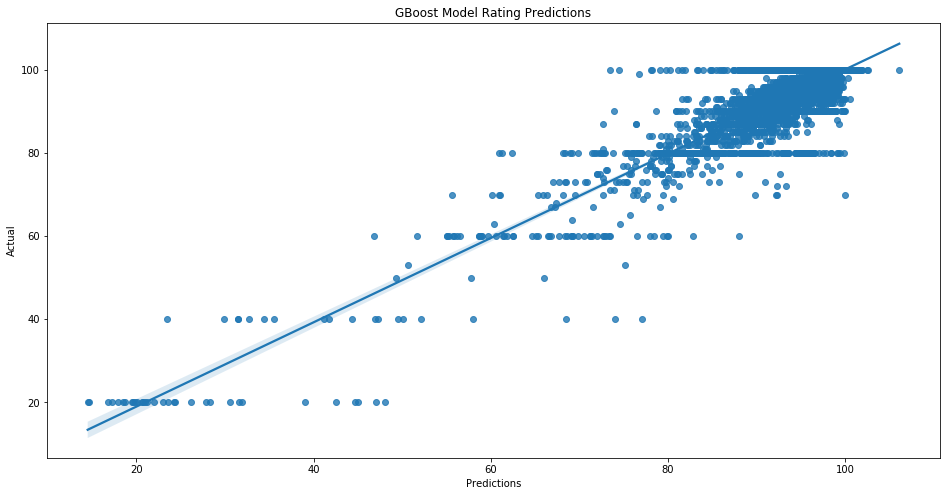

In [31]:
plt.figure(figsize=(16,8))
sns.regplot(predictions_r,y_test_r)
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.title("GBoost Model Rating Predictions")
plt.show()

In [34]:
#xgboost rating predictions
X = result.drop(['review_scores_rating'],axis = 1)
y = result['review_scores_rating']
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X, y, test_size=0.2, random_state=101)
xgb = xgboost.XGBRegressor(n_estimators=310,learning_rate=0.1,objective='reg:squarederror')
xgb.fit(X_train_r,y_train_r)
ypred_r = xgb.predict(X_test_r)

In [35]:
print('MAE:', metrics.mean_absolute_error(y_test_r, ypred_r))
print('MSE:', metrics.mean_squared_error(y_test_r, ypred_r))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test_r, ypred_r)))

MAE: 2.4193024619567347
MSE: 16.902511703931147
RMSE: 4.111266435531896


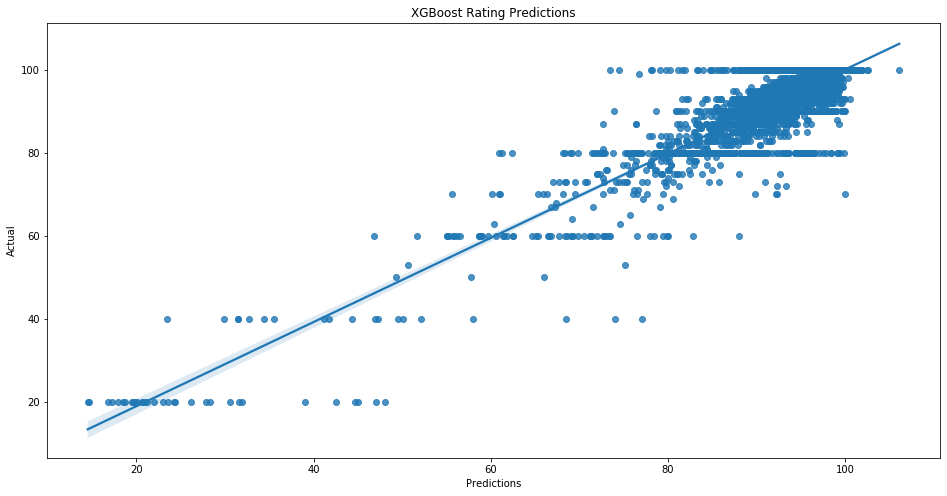

In [36]:
plt.figure(figsize=(16,8))
sns.regplot(predictions_r,y_test_r)
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.title("XGBoost Rating Predictions")
plt.show()

In [37]:
error_diff = pd.DataFrame({'Actual Values': np.array(y_test_r).flatten(), 'Predicted Values': ypred_r.flatten()})
error_diff1 = error_diff.head(20)
error_diff1
title=['Pred vs Actual']
fig = go.Figure(data=[
    go.Bar(name='Predicted', x=error_diff1.index, y=error_diff['Predicted Values']),
    go.Bar(name='Actual', x=error_diff1.index, y=error_diff['Actual Values'])
])

fig.update_layout(barmode='group')
fig.show()